# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
users = pd.read_csv("dataset/users.csv", index_col=0)

In [3]:
users.head()

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [4]:
users.shape

(11508, 5)

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [6]:
len(set(users.index))

11508

## Name

show the records with Null names

In [7]:
users[users.name.isna()]

,name,lang,bot,created_at,statuses_count
id,,,,,
2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


In [8]:
null_names_ids = users.name.isna()

## Lang

In [9]:
users.lang.unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

In [12]:
len(users.lang.unique())

26

In [10]:
users.lang.value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

<AxesSubplot: >

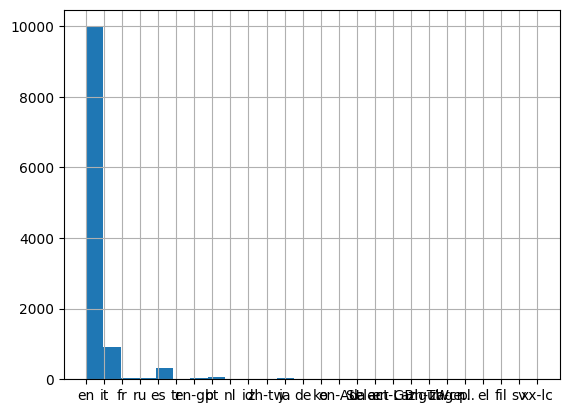

In [13]:
users.lang.hist(bins=26)

In [11]:
users.bot.unique()

array([1, 0])

In [12]:
users.bot.value_counts()

1    6116
0    5392
Name: bot, dtype: int64

## Created_at

In [13]:
try:
    pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    # do something
    print("All the dates are ok!")
except ValueError as e:
    print(e)


All the dates are ok!


In [14]:
users.created_at.min()

'2012-01-24 01:57:38'

In [15]:
users.created_at.max()

'2020-04-21 07:28:31'

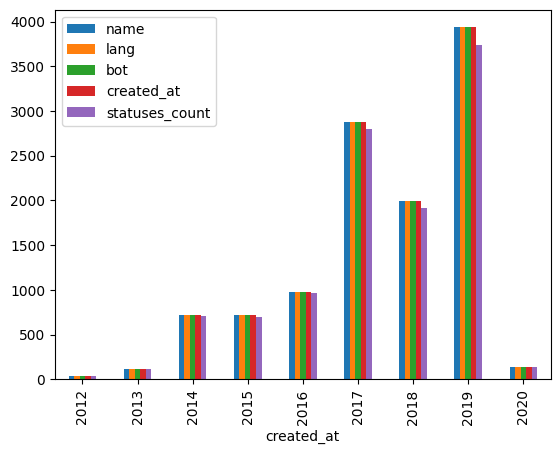

In [16]:
users.groupby(pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise').dt.year).count().plot(kind="bar")
plt.show()

## Statuses_count

In [17]:
null_statuses_count_ids = users.statuses_count.isna()

In [18]:
users.statuses_count[~null_statuses_count_ids].describe()

count     11109.000000
mean       5883.312359
std       19073.007305
min           0.000000
25%          41.000000
50%          68.000000
75%        2916.000000
max      399555.000000
Name: statuses_count, dtype: float64

In [19]:
users[users.bot == 0].statuses_count[~null_statuses_count_ids].describe()

count      4993.000000
mean      11638.219107
std       26719.438432
min           0.000000
25%          61.000000
50%        2041.000000
75%       11585.000000
max      399555.000000
Name: statuses_count, dtype: float64

In [20]:
users[users.bot == 1].statuses_count[~null_statuses_count_ids].describe()

count      6116.000000
mean       1185.102845
std        5373.550630
min           0.000000
25%          32.000000
50%          53.000000
75%          78.000000
max      214410.000000
Name: statuses_count, dtype: float64

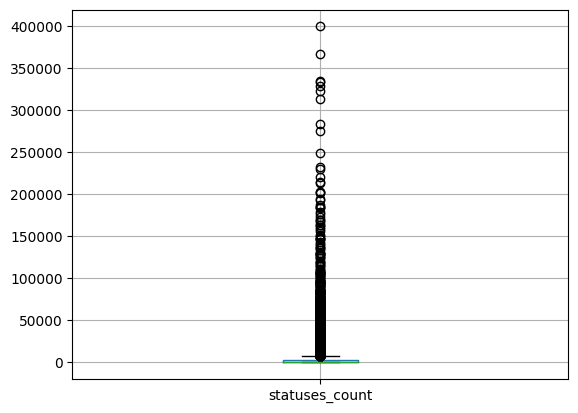

In [21]:
pd.DataFrame(users.statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

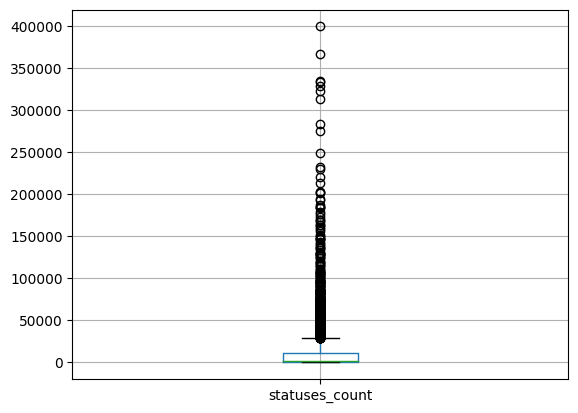

In [22]:
pd.DataFrame(users[users.bot == 0].statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

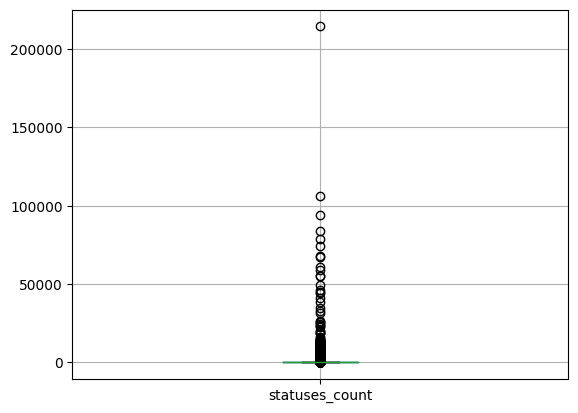

In [23]:
pd.DataFrame(users[users.bot == 1].statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

## Tweets

In [14]:
tweets = pd.read_csv("dataset/tweets.csv", index_col=0)

In [49]:
tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [50]:
tweets.shape

(13664696, 9)

In [51]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 1.0+ GB


## Index

In [52]:
# see the distribution of the lenght of the index
vlen = np.vectorize(lambda x: len(str(x)))
indexes = pd.Series(vlen(tweets.index.to_numpy()))

In [53]:
indexes.value_counts()

18    11768032
10      260089
17      257383
9       244274
8       243829
11      196364
15      190738
16      190716
7        73470
6        56160
5        54575
4        54307
3        53785
14       18930
13        1838
12         206
dtype: int64

In [54]:
# see if some indexes are duplicated
index_value_counts = tweets.index.value_counts()
print(index_value_counts)

dmy                   14
qsa                   12
jgm                   11
nis                   11
rdw                   11
                      ..
39790722903            1
2315433335             1
588516208669904896     1
582303273803243521     1
486479812614451200     1
Name: id, Length: 11672135, dtype: int64


In [55]:
# we can see that some index are not numbers and are duplicated
# which index are duplicated
index_value_counts[index_value_counts > 1]

dmy                   14
qsa                   12
jgm                   11
nis                   11
rdw                   11
                      ..
525746165019840513     2
314469529713512448     2
552992073792499712     2
427843738061533185     2
512636477051002880     2
Name: id, Length: 1969699, dtype: int64

In [56]:
print(f"number of duplicated rows: {index_value_counts[index_value_counts > 1].sum()}")

number of duplicated rows: 3962258


In [57]:
print(f"difference between number of unique id and the number of duplication: {3962258 - 1969699}")

difference between number of unique id and the number of duplication: 1992559


In [15]:
# drop duplicated rows
not_duplicated_tweets = tweets.drop_duplicates()

In [16]:
not_duplicated_tweets.shape

(11712093, 9)

In [17]:
print(f"removed rows : {13664696 - 11712093}")

removed rows : 1952603


In [18]:
index_value_counts = not_duplicated_tweets.index.value_counts()
print(index_value_counts)

dmy                   14
qsa                   12
mxo                   11
nis                   11
rdw                   11
                      ..
472403921332613120     1
583261659797426176     1
361607898599657473     1
582869903788634113     1
486479812614451200     1
Name: id, Length: 11671631, dtype: int64


In [19]:
not_duplicated_tweets.loc["dmy"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
dmy,2882736641,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-24 17:07:08,NaN
dmy,138492664,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-29 13:07:05,NaN
dmy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 01:52:25,NaN
dmy,467136996,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-17 06:21:50,NaN
dmy,816485959,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-09 17:24:53,NaN
dmy,531252639,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-08 21:28:02,NaN
dmy,520977237,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-06 01:58:36,NaN
dmy,535901760,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-06 04:07:20,NaN
dmy,2351661655,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07 04:55:39,NaN


In [63]:
not_duplicated_tweets.loc["qsa"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
qsa,2969210974,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-16 07:17:30,NaN
qsa,466307762,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-20 06:17:27,NaN
qsa,521093819,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 17:46:58,NaN
qsa,614197225,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-01 21:16:45,NaN
qsa,2528822924,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-12 01:56:45,NaN
qsa,2462247966,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-18 04:36:32,NaN
qsa,466426767,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-18 05:18:46,NaN
qsa,290054590,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-12 00:10:40,NaN
qsa,141883652,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-05 09:45:16,NaN


In [20]:
# we can see strange entries for non numerical indexes, try to eliminate them
numerical_indexes_ids = pd.Series(not_duplicated_tweets.index.str.isnumeric())

In [21]:
numerical_indexes_ids[numerical_indexes_ids.isna()] = False

In [22]:
# we can see the percentage of NaN element of the non numerical indexes
nan_element = np.sum(not_duplicated_tweets[numerical_indexes_ids.to_numpy()].isna()).sum()
total_element = np.dot(*not_duplicated_tweets[numerical_indexes_ids.to_numpy()].shape)

print(nan_element)
print(total_element)

print(nan_element/total_element)

# understand if the following removal are necessary

3873473
101504097
0.03816075522547627


In [24]:
not_duplicated_tweets_2 = not_duplicated_tweets[numerical_indexes_ids.to_numpy()]

In [25]:
not_duplicated_tweets_2.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [69]:
index_value_counts = not_duplicated_tweets_2.index.value_counts()
print(index_value_counts)

35695732              2
64474136              2
36322718              2
41862725              2
41466620              2
                     ..
583731329663021056    1
421595173718876161    1
593166415777177600    1
511007179747639296    1
486479812614451200    1
Name: id, Length: 11278006, dtype: int64


In [70]:
not_duplicated_tweets_2.loc["35695732"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
35695732,2973235579,NaN,NaN,NaN,NaN,0.0,NaN,2020-03-31 04:08:59,RT @Randall_Jr: “@Drrake: This music video turnt
35695732,467123525,NaN,NaN,NaN,NaN,z9up3zr,0,2019-08-19 05:29:35,"Che bella la riconoscenza, sorride sempre ed Ã..."


In [71]:
not_duplicated_tweets_2.loc["41862725"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
41862725,21074492,0,NaN,NaN,NaN,NaN,NaN,2018-07-21 09:03:40,NaN
41862725,1394115517,0,NaN,NaN,NaN,NaN,NaN,2020-03-10 12:35:58,NaN


In [73]:
index_value_counts = not_duplicated_tweets_2.index.value_counts()
print(index_value_counts)

35695732              2
64474136              2
36322718              2
41862725              2
41466620              2
                     ..
583731329663021056    1
421595173718876161    1
593166415777177600    1
511007179747639296    1
486479812614451200    1
Name: id, Length: 11278006, dtype: int64


In [ ]:
tweets = not_duplicated_tweets

## User_id

In [26]:
tweets.user_id.value_counts()

497404180     4600
7004532       4580
157029836     4578
1693274954    4572
491630583     4570
              ... 
9a8wb95x4        1
ql8aw            1
40rcr            1
syeybyw2um       1
tzn9s6bwj        1
Name: user_id, Length: 222285, dtype: int64

In [27]:
unique_user_id = tweets.user_id.unique()
print(len(unique_user_id))

222286


In [28]:
numeric_user_id = pd.Series(tweets.user_id.str.isnumeric())
numeric_user_id[numeric_user_id.isna()] = False

valid_ids = numeric_user_id

In [29]:
print(f"numerical ids {np.sum(numeric_user_id)}")

numerical ids 13230683


In [30]:
value_counts_number_user_id = tweets.user_id[numeric_user_id].value_counts()
print(value_counts_number_user_id)

497404180     4600
7004532       4580
157029836     4578
1693274954    4572
491630583     4570
              ... 
479096           1
96075            1
1385297372       1
37023            1
261              1
Name: user_id, Length: 12172, dtype: int64


In [31]:
# function to handle non negative numerical values and outliers

def function_handle_nnn(feature_name = None):
    
    print(f"Feature: {feature_name}")
    
    # valid numbers
    numerical_entries = pd.Series(tweets[feature_name].str.isnumeric())
    numerical_entries[numerical_entries.isna()] = False
    
    numeric_count = pd.to_numeric(tweets[feature_name], errors="coerce")
    
    
    na_ids_count = numeric_count.isna()
    inf_ids_count = numeric_count.apply(np.isinf)
    negative_ids_count = numeric_count.apply(lambda x: x<0)
    
    print(f"Number of NaN elements: {np.sum(na_ids_count)}")
    print(f"Number of inf elements: {np.sum(inf_ids_count)}")
    print(f"Number of negative elements: {np.sum(negative_ids_count)}", end="\n")

    valid_numbers = np.logical_or(na_ids_count, inf_ids_count)
    valid_numbers = ~np.logical_or(valid_numbers, negative_ids_count)
    valid_numbers = np.logical_and(valid_numbers, numerical_entries).astype(bool)
        
    description = numeric_count[valid_numbers].describe()
    print("Description:")
    print(description, end="\n")
    
    value_counts = numeric_count[valid_numbers].value_counts()
    print("Value counts:")
    print(value_counts, end="\n")
    
    print("Histogram:")
    numeric_count[valid_numbers].hist(bins=len(numeric_count[valid_numbers].unique()))
    plt.show()
        
    # remove outliers
    IQR = numeric_count[valid_numbers].quantile(0.75) - numeric_count[valid_numbers].quantile(0.25)
    outlier_value = numeric_count[valid_numbers].quantile(0.75) + 1.5*IQR
    print(outlier_value)
    numeric_count[numeric_count>outlier_value] = outlier_value
    
    print("removed outliers", end="\n")
    
    # remove non valid numbers    
    mode = numeric_count[valid_numbers].mode()
    
    print(mode)
    
    numeric_count[~valid_numbers] = mode[0]
    
    print("removed non valid numbers", end="\n")

    value_counts = numeric_count.value_counts()
    print("Value counts:")
    print(value_counts, end="\n")
        
    pd.DataFrame(numeric_count).boxplot()
    plt.show()
    
    return valid_numbers, numeric_count

## Retweet_count

Feature: retweet_count
Number of NaN elements: 625456
Number of inf elements: 1
Number of negative elements: 0
Description:
count    1.303915e+07
mean     5.993622e+02
std      6.623562e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.295320e+08
Name: retweet_count, dtype: float64
Value counts:
0.0         9419784
1.0         1172028
2.0          357098
3.0          180191
4.0          111526
             ...   
154942.0          1
81166.0           1
53904.0           1
193800.0          1
376246.0          1
Name: retweet_count, Length: 45773, dtype: int64
Histogram:


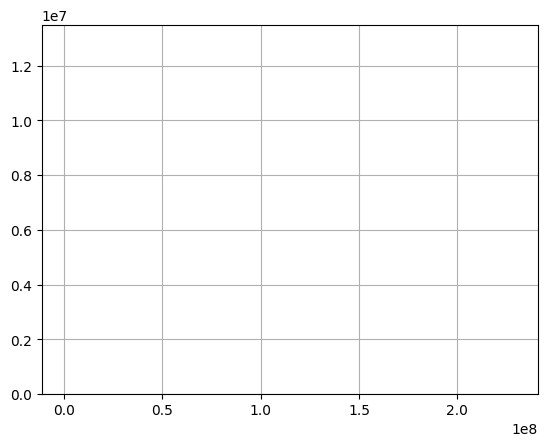

2.5
removed outliers
0    0.0
Name: retweet_count, dtype: float64
removed non valid numbers
Value counts:
0.0    10045326
2.5     2090244
1.0     1172028
2.0      357098
Name: retweet_count, dtype: int64


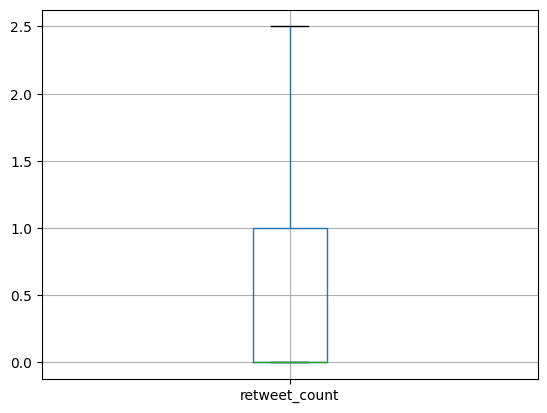

In [32]:
valid_numbers_retweets, cleaned_retweet_count = function_handle_nnn("retweet_count")
valid_ids = np.logical_and(valid_ids, valid_numbers_retweets)

## reply count

Feature: reply_count
Number of NaN elements: 809504
Number of inf elements: 1
Number of negative elements: 0
Description:
count    1.181078e+07
mean     4.673646e+00
std      1.299745e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.458600e+07
Name: reply_count, dtype: float64
Value counts:
0.0        11790443
1.0           15670
2.0            1455
3.0             492
4.0             249
             ...   
935.0             1
24912.0           1
143.0             1
395.0             1
178.0             1
Name: reply_count, Length: 658, dtype: int64
Histogram:


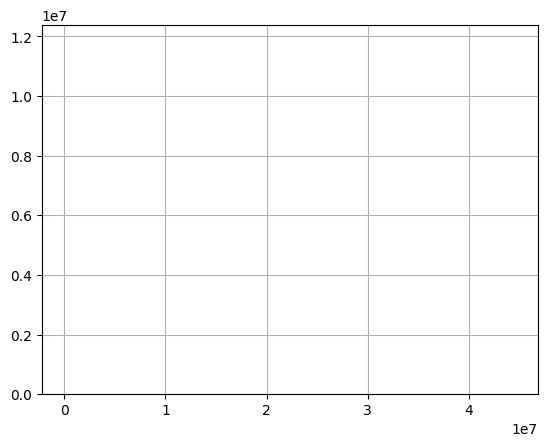

0.0
removed outliers
0    0.0
Name: reply_count, dtype: float64
removed non valid numbers
Value counts:
0.0    13664696
Name: reply_count, dtype: int64


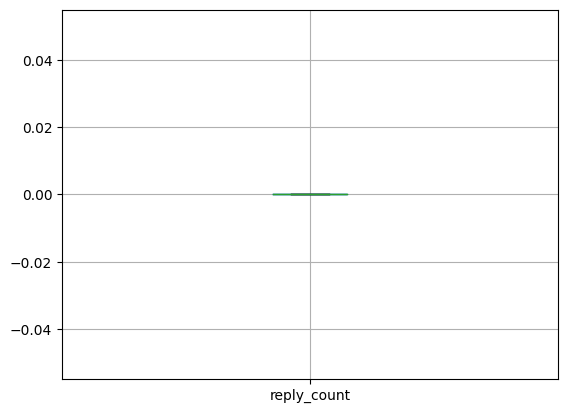

In [33]:
valid_numbers_reply, cleaned_reply_count = function_handle_nnn("reply_count")
valid_ids = np.logical_and(valid_ids, valid_numbers_reply)

## Favorite count

Feature: favorite_count
Number of NaN elements: 808097
Number of inf elements: 0
Number of negative elements: 1
Description:
count    1.181077e+07
mean     4.414380e+01
std      1.400179e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.810824e+08
Name: favorite_count, dtype: float64
Value counts:
0.0       9467210
1.0       1408467
2.0        407252
3.0        183342
4.0        100369
           ...   
546.0           1
1928.0          1
4200.0          1
1366.0          1
3063.0          1
Name: favorite_count, Length: 1573, dtype: int64
Histogram:


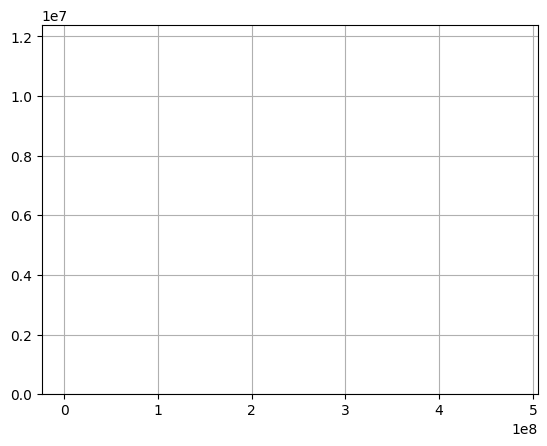

0.0
removed outliers
0    0.0
Name: favorite_count, dtype: float64
removed non valid numbers
Value counts:
0.0    13664696
Name: favorite_count, dtype: int64


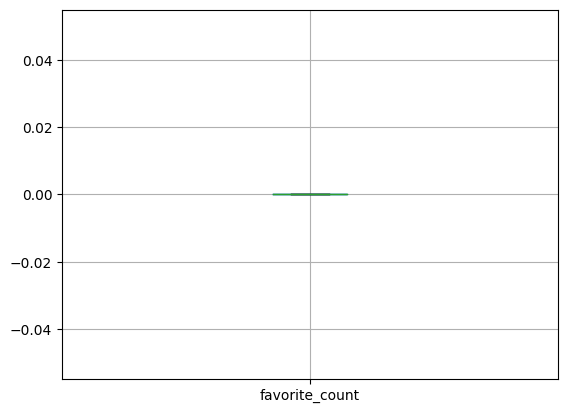

In [34]:
valid_numbers_favorite, cleaned_favorite_count = function_handle_nnn("favorite_count")
valid_ids = np.logical_and(valid_ids, valid_numbers_favorite)

## num hashtags

Feature: num_hashtags
Number of NaN elements: 1163677
Number of inf elements: 0
Number of negative elements: 0
Description:
count    1.181057e+07
mean     1.158370e+00
std      2.009555e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.747961e+06
Name: num_hashtags, dtype: float64
Value counts:
0.0       10470209
1.0         911568
2.0         270668
3.0          88101
4.0          32559
            ...   
1847.0           1
215.0            1
3423.0           1
8873.0           1
949.0            1
Name: num_hashtags, Length: 345, dtype: int64
Histogram:


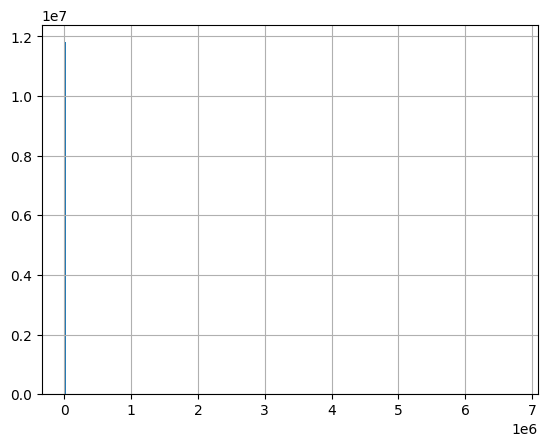

0.0
removed outliers
0    0.0
Name: num_hashtags, dtype: float64
removed non valid numbers
Value counts:
0.0    13664696
Name: num_hashtags, dtype: int64


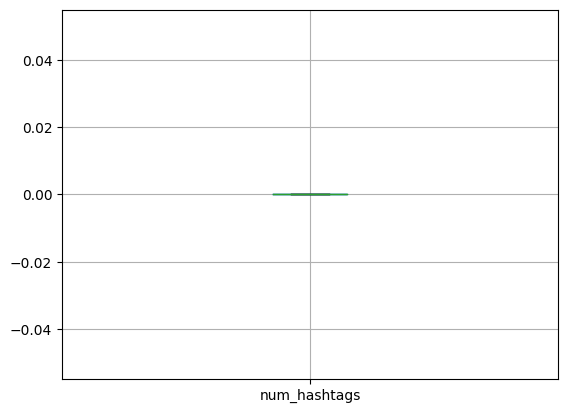

In [35]:
valid_numbers_hashtags, cleaned_num_hashtags = function_handle_nnn("num_hashtags")
valid_ids = np.logical_and(valid_ids, valid_numbers_hashtags)

## Num urls

Feature: num_urls
Number of NaN elements: 808953
Number of inf elements: 0
Number of negative elements: 0
Description:
count    1.181078e+07
mean     7.257129e+00
std      1.730760e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.859340e+07
Name: num_urls, dtype: float64
Value counts:
0.0        9894198
1.0        1890891
2.0          23770
3.0            938
4.0            314
            ...   
523.0            1
18.0             1
2560.0           1
24087.0          1
260.0            1
Name: num_urls, Length: 508, dtype: int64
Histogram:


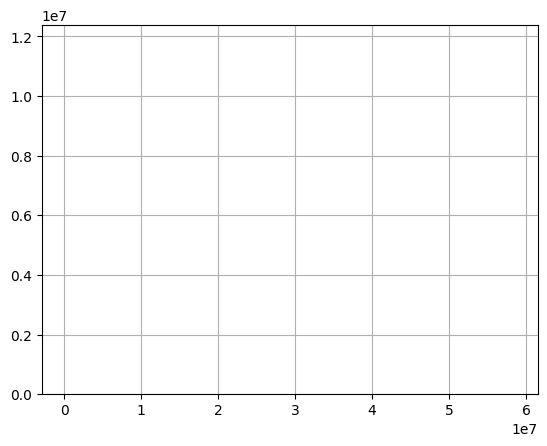

0.0
removed outliers
0    0.0
Name: num_urls, dtype: float64
removed non valid numbers
Value counts:
0.0    13664696
Name: num_urls, dtype: int64


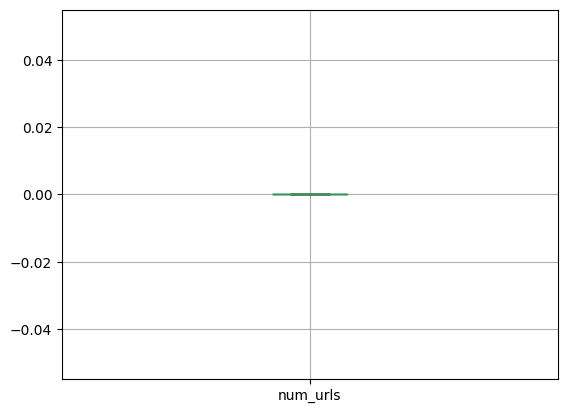

In [36]:
valid_numbers_urls, cleaned_num_ursl = function_handle_nnn("num_urls")
valid_ids = np.logical_and(valid_ids, valid_numbers_urls)

## Num mentions

Feature: num_mentions
Number of NaN elements: 987990
Number of inf elements: 0
Number of negative elements: 0
Description:
count    1.267664e+07
mean     1.075931e+00
std      4.949400e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      9.174080e+05
Name: num_mentions, dtype: float64
Value counts:
0.0       7561629
1.0       4106916
2.0        718191
3.0        174700
4.0         55558
           ...   
767.0           1
253.0           1
3249.0          1
48.0            1
4509.0          1
Name: num_mentions, Length: 435, dtype: int64
Histogram:


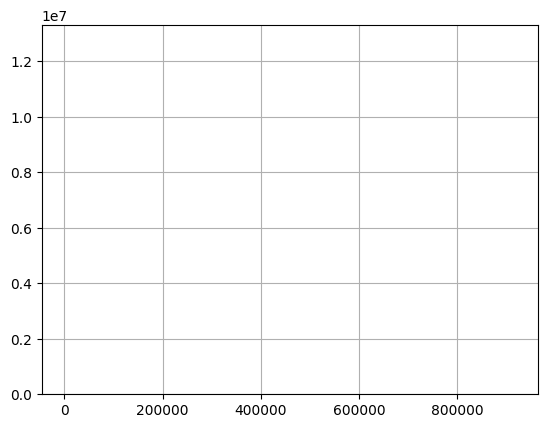

2.5
removed outliers
0    0.0
Name: num_mentions, dtype: float64
removed non valid numbers
Value counts:
0.0    8549683
1.0    4106916
2.0     718191
2.5     289906
Name: num_mentions, dtype: int64


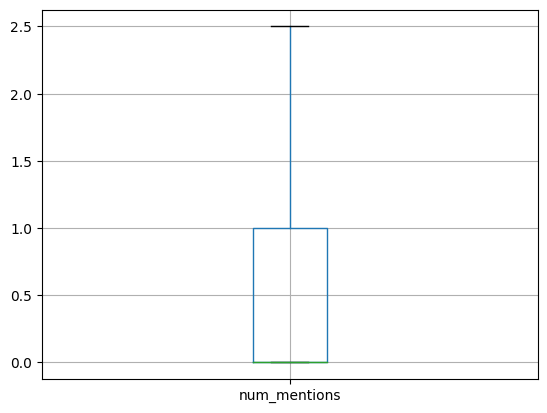

In [37]:
valid_numbers_mentions, cleaned_num_mentions = function_handle_nnn("num_mentions")
valid_ids = np.logical_and(valid_ids, valid_numbers_mentions)

In [39]:
# get the valid numerical rows
tweets = tweets[valid_ids]

In [40]:
tweets.shape

(11810201, 9)

In [41]:
tweets_noout = pd.DataFrame()
tweets_noout["retweet_count"] = cleaned_retweet_count
tweets_noout["reply_count"] = cleaned_reply_count
tweets_noout["favorite_count"] = cleaned_favorite_count
tweets_noout["num_hashtags"] = cleaned_num_hashtags
tweets_noout["num_urls"] = cleaned_num_ursl
tweets_noout["num_mentions"] = cleaned_num_mentions

## numerical correlations

In [46]:
numerical_cols = ["retweet_count", "reply_count", "favorite_count", "num_hashtags", "num_urls", "num_mentions"]

In [55]:
sub_numerical_tweets = tweets_noout[numerical_cols]

In [48]:
sub_numerical_tweets.head()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
id,,,,,,
509354017856950272,0.0,0.0,0.0,0.0,0.0,0.0
583002592529121280,1.0,0.0,0.0,0.0,0.0,1.0
461498835362013185,0.0,0.0,0.0,0.0,0.0,1.0
528808127366692864,0.0,0.0,0.0,0.0,0.0,0.0
575336690904006656,2.5,0.0,0.0,0.0,0.0,1.0


In [57]:
sub_numerical_tweets = sub_numerical_tweets.astype(float)

In [58]:
sub_numerical_tweets.sample(10000).corr()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
retweet_count,1.000000,NaN,NaN,NaN,NaN,0.360363
reply_count,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,NaN,NaN,NaN,NaN,NaN,NaN
num_hashtags,NaN,NaN,NaN,NaN,NaN,NaN
num_urls,NaN,NaN,NaN,NaN,NaN,NaN
num_mentions,0.360363,NaN,NaN,NaN,NaN,1.000000


## Created at

In [60]:
try:
    pd.to_datetime(tweets.created_at, format='%Y-%m-%d %H:%M:%S', errors='raise')
    # do something
    print("All the dates are ok!")
except ValueError as e:
    print(e)

All the dates are ok!


In [61]:
# prima della creazione di tweetter
tweets.created_at.min()

'1953-04-17 12:24:33'

In [62]:
# nel futuro
tweets.created_at.max()

'2040-04-27 11:03:25'